In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'F:\2014\machine learning\df_with_label.csv')
df = df.drop("Unnamed: 0", axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,label
0,0.000000,0.000000,1.893346,0.463756,0.000000,0.000000,0.000000,1.330937,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.674875,0.000000,0.000000,0.956220,1.756070,0.585650,sonati jadid
1,1.661146,0.128795,1.199578,0.000000,0.000000,0.825294,0.000000,1.308425,0.000000,0.000000,...,0.000000,0.897866,1.583035,0.133059,0.595840,0.000000,0.000000,1.407604,0.000000,ghami
2,1.024184,0.000000,0.920782,0.000000,0.000000,0.055295,0.131389,0.949121,0.000000,0.000000,...,0.000000,0.419429,2.027668,1.413473,0.101486,0.000000,0.173823,0.154600,0.000000,sonati jadid
3,1.092891,0.000000,1.059919,0.000000,1.977198,0.251382,0.000000,0.407826,0.000000,1.094386,...,0.000000,0.000000,0.000000,1.320270,0.040753,0.104092,0.000000,1.064408,0.000000,sonnati
4,1.489010,0.334922,0.000000,0.000000,0.874855,0.000000,0.825278,0.000000,0.340124,0.622463,...,2.036493,0.000000,0.000000,0.129767,0.485491,0.000000,0.225310,0.000000,1.085020,sonnati
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1.743965,1.682947,0.434675,0.000000,0.000000,1.218757,0.832795,1.020304,0.000000,0.635938,...,0.000000,1.658071,0.500794,0.114148,0.000000,0.200582,0.426609,0.000000,0.483462,ghami
3208,0.145117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.461095,0.000000,0.449566,0.000000,0.000000,0.000000,0.000000,0.000000,ghami
3209,1.873502,0.000000,0.177031,0.000000,0.000000,0.953736,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.791558,0.000000,0.000000,1.631305,1.642412,1.428384,0.000000,1.398847,azari shad
3210,1.261099,1.665591,0.000000,0.440453,0.000000,2.226984,1.274004,0.000000,0.000000,1.030790,...,0.000000,2.511752,0.654774,0.000000,0.000000,0.105648,0.709863,0.000000,0.000000,ghami


In [3]:
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nMissing values :  ', df.isnull().sum().values.sum())

Rows     :  3212
Columns  :  513

Missing values :   0


In [4]:
labels = pd.read_csv(r'labels.csv')
label_target = labels.label
label_target

0                  68
1                Aram
2      asheghane shad
3          azari shad
4            base_dar
5             davidan
6              ganoon
7     ghadimi_molaiem
8        ghadimi_shad
9               ghami
10              gitar
11             madahi
12       madahi azari
13           neianban
14                ney
15                ood
16              party
17              piano
18                rap
19         rithm tond
20                ruk
21            santoor
22       sazhaye_zehi
23         saz_dahani
24              setar
25               shad
26       sonati jadid
27            sonnati
28            tanboor
Name: label, dtype: object

In [5]:
X = df.drop("label", axis=1)
y = df.label.values


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify=y)

In [7]:
model = RandomForestClassifier(n_estimators=150, max_depth=20 , max_features=0.8, max_samples=0.7, min_samples_leaf=3, n_jobs=-1)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.8, max_samples=0.7,
                       min_samples_leaf=3, n_estimators=150, n_jobs=-1)

In [8]:
print('score train = ', model.score(x_train, y_train))
print('score test = ', model.score(x_test, y_test))

score train =  0.9637991436356559
score test =  0.47900466562986005


In [9]:
y_pred = model.predict(x_test)

In [10]:

confusion = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

             68       0.50      0.16      0.24        19
           Aram       0.28      0.26      0.27        54
 asheghane shad       0.40      0.73      0.51        86
     azari shad       0.46      0.33      0.39        18
       base_dar       0.40      0.23      0.29        26
        davidan       0.00      0.00      0.00         2
         ganoon       0.00      0.00      0.00         7
ghadimi_molaiem       1.00      0.07      0.12        15
   ghadimi_shad       0.47      0.63      0.54        35
          ghami       0.32      0.31      0.31        58
          gitar       0.72      0.76      0.74        17
         madahi       0.66      0.85      0.74        54
   madahi_azari       1.00      0.17      0.29         6
       neianban       1.00      0.57      0.73         7
            ney       1.00      0.33      0.50         9
            ood       1.00      0.80      0.89         5
          party       0.00    

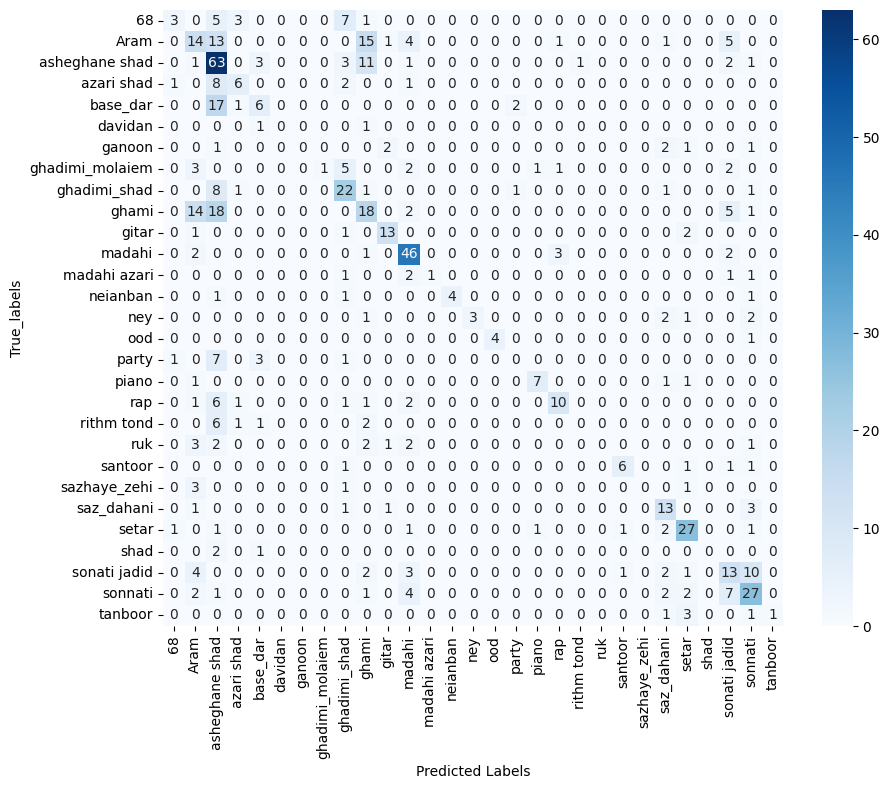

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",xticklabels=label_target, yticklabels=label_target)
plt.xlabel("Predicted Labels")
plt.ylabel("True_labels")
plt.show()

In [43]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", C=2.0)
svm.fit(x_train, y_train)

SVC(C=2.0)

In [44]:
print('score train = ', svm.score(x_train, y_train))
print('score test = ', svm.score(x_test, y_test))

score train =  0.835733748540288
score test =  0.5349922239502333


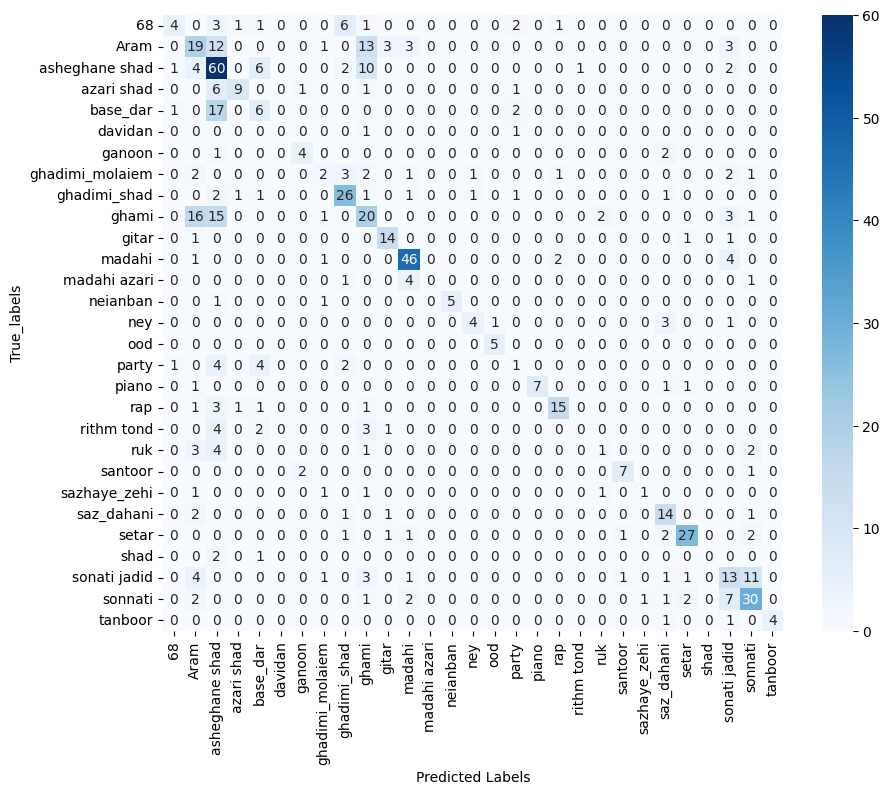

In [45]:
y_predict = svm.predict(x_test)
Confusion = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(10,8))
sns.heatmap(Confusion, annot=True, fmt="d", cmap="Blues",xticklabels=label_target, yticklabels=label_target)
plt.xlabel("Predicted Labels")
plt.ylabel("True_labels")
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [50]:
print('score train = ', LR.score(x_train, y_train))
print('score test = ', LR.score(x_test, y_test))

score train =  0.9143635655897236
score test =  0.48055987558320373


In [51]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)
y_score = LR.fit(x_train, y_train).predict_proba(x_test)

In [53]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  

(643, 29)

In [54]:
label_binarizer.transform(["rap"])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0]])

In [55]:
class_of_interest = "rap"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

18

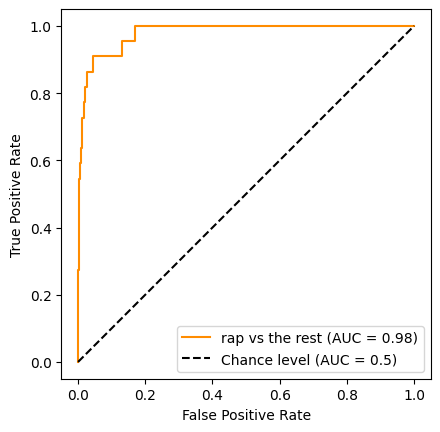

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("")
plt.legend()